In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [1]:
data = pd.read_csv('data/data.csv')

NameError: name 'pd' is not defined

In [ ]:
data.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,09-01-2005,AD,09-12-2005,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4",AD
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/05,LMCI,11-08-2005,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3",MCI
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,09-02-2005,CN,09-07-2005,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3",CN
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,11/15/05,LMCI,11/29/05,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3",MCI
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,11-07-2005,AD,11-10-2005,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4",AD


In [ ]:
data.isnull().sum()

directory.id               0
Subject                    0
RID                        0
Image.Data.ID              0
Modality                   0
Visit                      0
Acq.Date                   0
DX.bl                      0
EXAMDATE                   0
AGE                        0
PTGENDER                   0
PTEDUCAT                   0
PTETHCAT                   0
PTRACCAT                   0
APOE4                      0
MMSE                       0
imputed_genotype           1
APOE Genotype              0
Dx Codes for Submission    0
dtype: int64

In [ ]:
data = data.dropna()
data.isnull().sum().sum()

0

In [ ]:
data.head(3)

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,09-01-2005,AD,09-12-2005,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4",AD
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/05,LMCI,11-08-2005,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3",MCI
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,09-02-2005,CN,09-07-2005,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3",CN


In [ ]:
X = data
Y = data['DX.bl']
# del data

remove_columns = list(X.columns)[0:9]
remove_columns.append('Dx Codes for Submission')
print('Removing columns:', remove_columns)

X = X.drop(remove_columns, axis=1)

features = list(X.columns)
X.head(5)

Removing columns: ['directory.id', 'Subject', 'RID', 'Image.Data.ID', 'Modality', 'Visit', 'Acq.Date', 'DX.bl', 'EXAMDATE', 'Dx Codes for Submission']


,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype
0,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4"
1,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3"
2,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3"
3,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3"
4,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4"


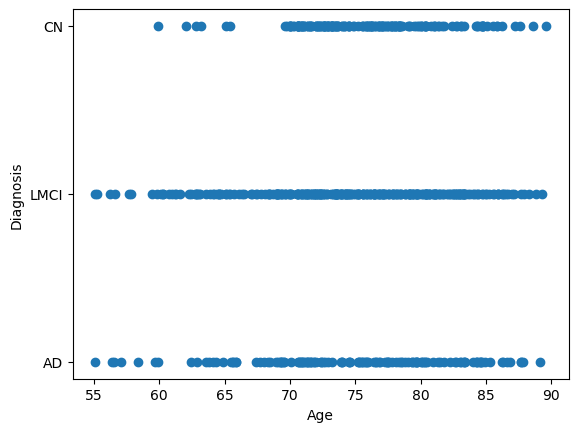

In [ ]:
plt.scatter(data['AGE'], data['DX.bl'])

plt.xlabel('Age')
plt.ylabel('Diagnosis')

plt.show()

In [ ]:
gender_ethnicity_counts = data.groupby(['DX.bl', 'PTGENDER', 'PTETHCAT']).size().reset_index(name='count')
print(gender_ethnicity_counts)

   DX.bl PTGENDER         PTETHCAT  count
0     AD   Female  Not Hisp/Latino     64
1     AD   Female          Unknown      1
2     AD     Male  Not Hisp/Latino     68
3     CN   Female      Hisp/Latino      2
4     CN   Female  Not Hisp/Latino     89
5     CN   Female          Unknown      1
6     CN     Male  Not Hisp/Latino     98
7   LMCI   Female      Hisp/Latino      4
8   LMCI   Female  Not Hisp/Latino    102
9   LMCI   Female          Unknown      1
10  LMCI     Male      Hisp/Latino      2
11  LMCI     Male  Not Hisp/Latino    195


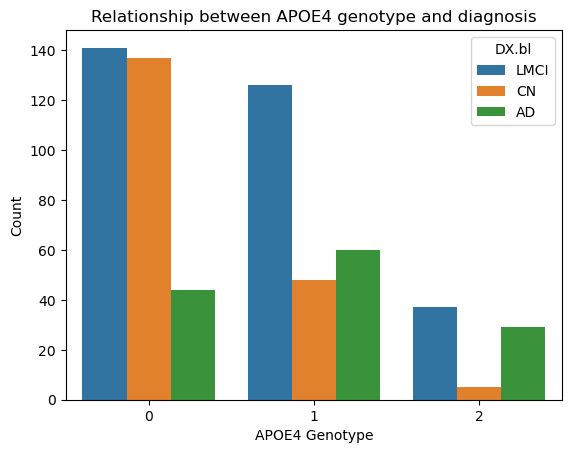

In [ ]:
sns.countplot(x='APOE4', hue='DX.bl', data=data)
plt.title('Relationship between APOE4 genotype and diagnosis')
plt.xlabel('APOE4 Genotype')
plt.ylabel('Count')
plt.show()

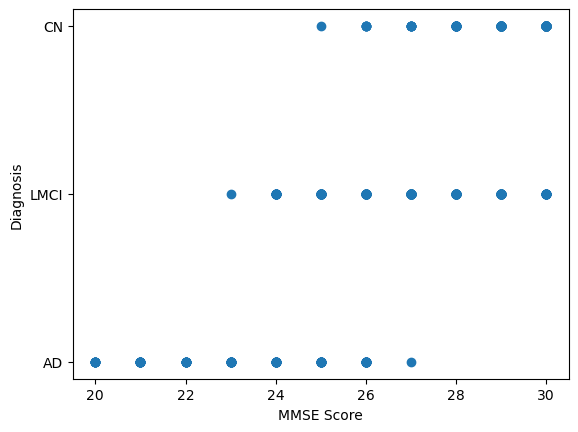

In [ ]:
plt.scatter(data['MMSE'], data['DX.bl'])

plt.xlabel('MMSE Score')
plt.ylabel('Diagnosis')

plt.show()

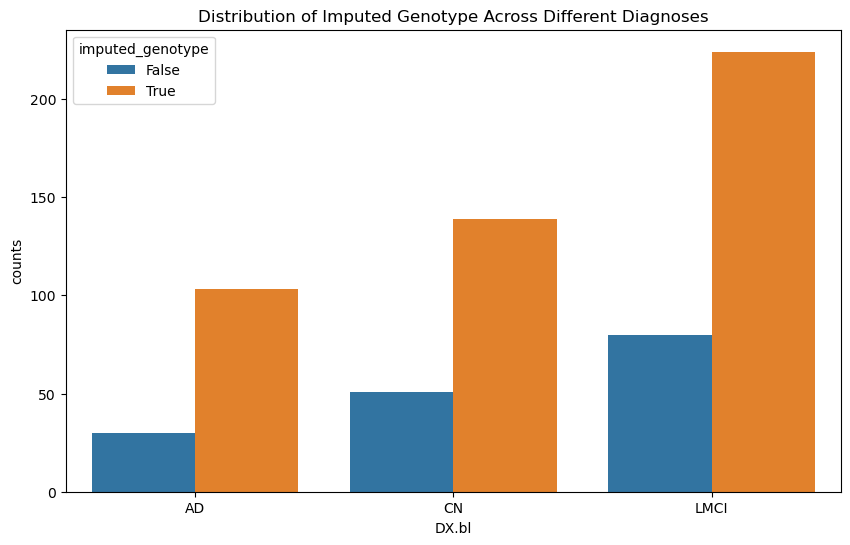

In [ ]:
counts = data.groupby(['DX.bl', 'imputed_genotype']).size().reset_index(name='counts')

plt.figure(figsize=(10,6))
ax = sns.barplot(x="DX.bl", y="counts", hue="imputed_genotype", data=counts)
ax.set_title('Distribution of Imputed Genotype Across Different Diagnoses')
plt.show()

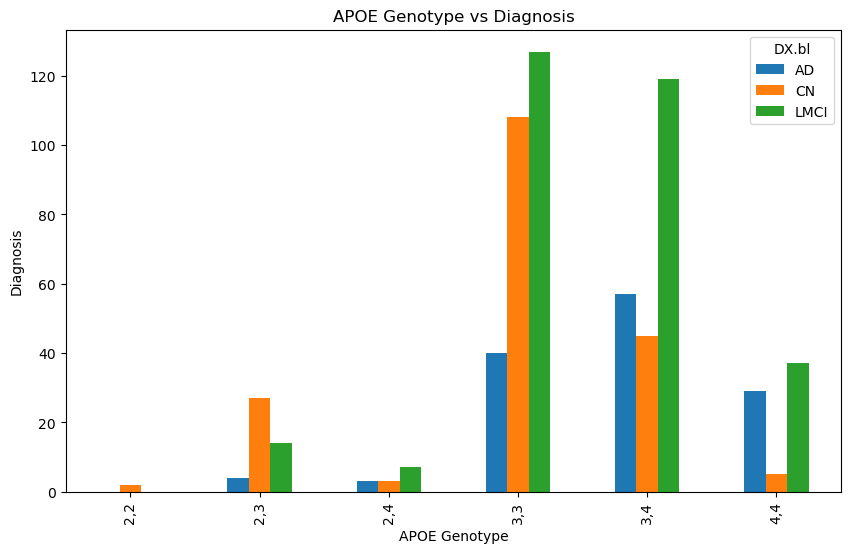

In [ ]:
ax = data.groupby(['APOE Genotype', 'DX.bl']).size().unstack().plot(kind='bar', figsize=(10,6))

ax.set_title('APOE Genotype vs Diagnosis')
ax.set_xlabel('APOE Genotype')
ax.set_ylabel('Diagnosis')

plt.show()

In [ ]:
numerical_vars = ['AGE', 'MMSE', 'PTEDUCAT']
cat_vars = list(set(features) - set(numerical_vars))

print('Categorical variable distributions:\n')

for var in cat_vars:
    print('\nDistribution of', var)
    
    print(X[var].value_counts())

Categorical variable distributions:


Distribution of PTGENDER
PTGENDER
Male      363
Female    264
Name: count, dtype: int64

Distribution of PTETHCAT
PTETHCAT
Not Hisp/Latino    616
Hisp/Latino          8
Unknown              3
Name: count, dtype: int64

Distribution of APOE4
APOE4
0    322
1    234
2     71
Name: count, dtype: int64

Distribution of APOE Genotype
APOE Genotype
3,3    275
3,4    221
4,4     71
2,3     45
2,4     13
2,2      2
Name: count, dtype: int64

Distribution of imputed_genotype
imputed_genotype
True     466
False    161
Name: count, dtype: int64

Distribution of PTRACCAT
PTRACCAT
White    583
Black     31
Asian     13
Name: count, dtype: int64


Numerical Var Distributions:



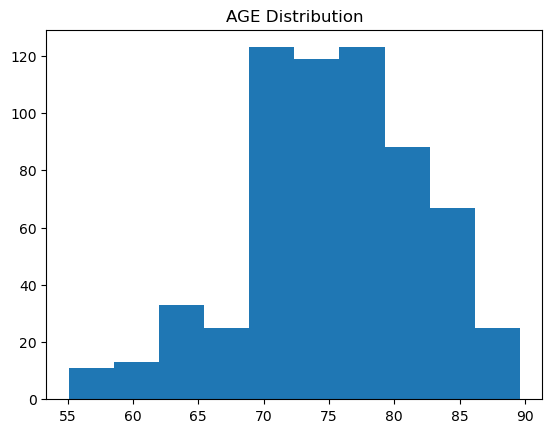

count    627.000000
mean      75.161882
std        6.689979
min       55.100000
25%       71.200000
50%       75.400000
75%       80.000000
max       89.600000
Name: AGE, dtype: float64


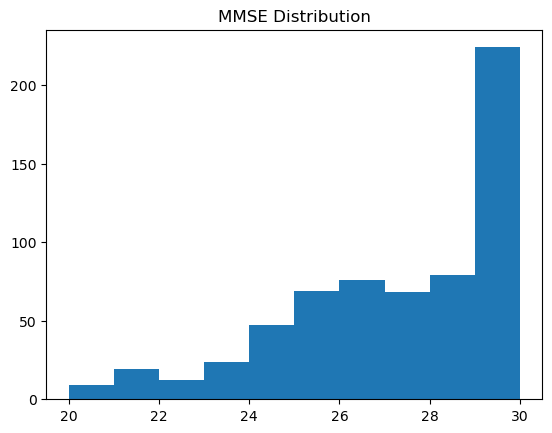

count    627.000000
mean      26.921850
std        2.563934
min       20.000000
25%       25.000000
50%       27.000000
75%       29.000000
max       30.000000
Name: MMSE, dtype: float64


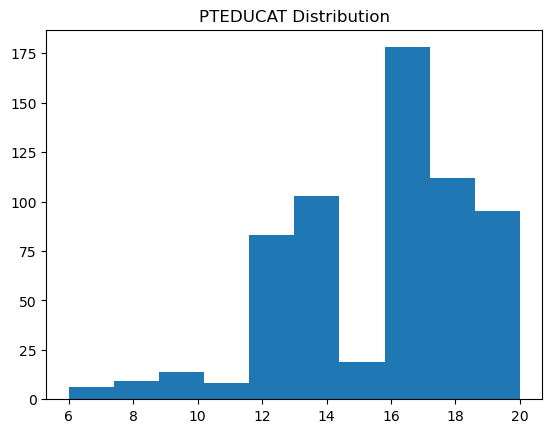

count    627.000000
mean      15.612440
std        2.978845
min        6.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       20.000000
Name: PTEDUCAT, dtype: float64


In [ ]:
print('Numerical Var Distributions:\n')

for var in numerical_vars:
    plt.hist(X[var], bins=10)
    plt.title(var + ' Distribution')
    plt.show()
    
    print(X[var].describe())

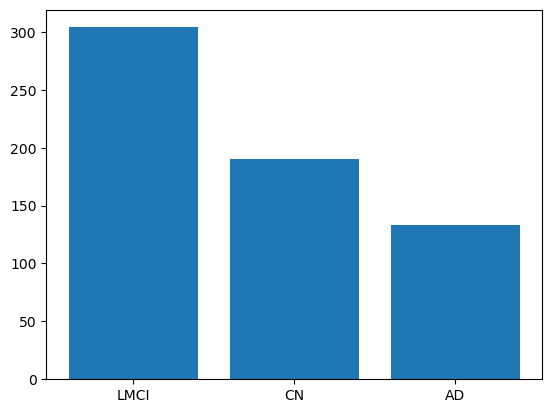

In [ ]:
plt.bar(Y.value_counts().index, Y.value_counts())
plt.show()

In [ ]:
for var in cat_vars:
    print(f'Converting {var} to 1-hot encoding')
    one_hot_df = pd.get_dummies(X[var], prefix=var)
    X = pd.concat([X, one_hot_df], axis=1)
    X.drop(var, axis=1, inplace=True)
    
X.head(4)

Converting PTGENDER to 1-hot encoding
Converting PTETHCAT to 1-hot encoding
Converting APOE4 to 1-hot encoding
Converting APOE Genotype to 1-hot encoding
Converting imputed_genotype to 1-hot encoding
Converting PTRACCAT to 1-hot encoding


,AGE,PTEDUCAT,MMSE,PTGENDER_Female,PTGENDER_Male,PTETHCAT_Hisp/Latino,PTETHCAT_Not Hisp/Latino,PTETHCAT_Unknown,APOE4_0,APOE4_1,...,"APOE Genotype_2,3","APOE Genotype_2,4","APOE Genotype_3,3","APOE Genotype_3,4","APOE Genotype_4,4",imputed_genotype_False,imputed_genotype_True,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_White
0,81.3,18,20,False,True,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,True
1,67.5,10,27,False,True,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
2,73.7,16,29,False,True,False,True,False,True,False,...,False,False,True,False,False,False,True,False,False,True
3,80.4,13,25,True,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,False,True


In [ ]:
def normalize(X):
    X = np.array(X)
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    normalized_X = (X - means) / stds

    print('Normalizing:')
    for i, (mean, std) in enumerate(zip(means, stds)):
        print(f'  Variable {i+1}: Mean = {mean:.2f}, Standard Deviation = {std:.2f}')

    return normalized_X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

num_test = X_test.shape[0]

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

Cross Validation: 67.48%
Accuracy: 73.81%
Precision: 74.09%
Recall: 73.81%
F1 Score: 73.79%
Confusion Matrix:


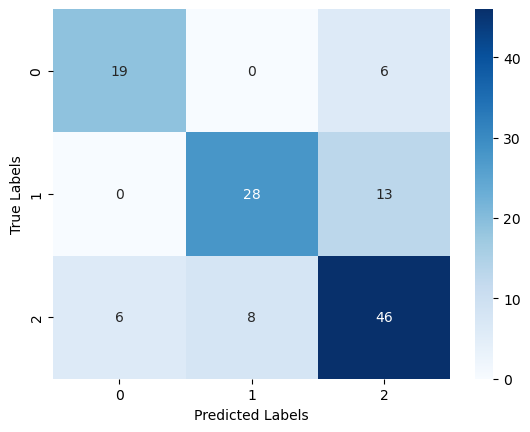

In [ ]:
lda_clf = LinearDiscriminantAnalysis(solver='svd', store_covariance=False, tol=0.0001)
lda_clf.fit(X_train, y_train)

y_pred = lda_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(lda_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

d:\ANconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\ANconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\ANconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\ANconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

Cross Validation: 69.87%
Accuracy: 75.40%
Precision: 75.51%
Recall: 75.40%
F1 Score: 75.41%
Confusion Matrix:


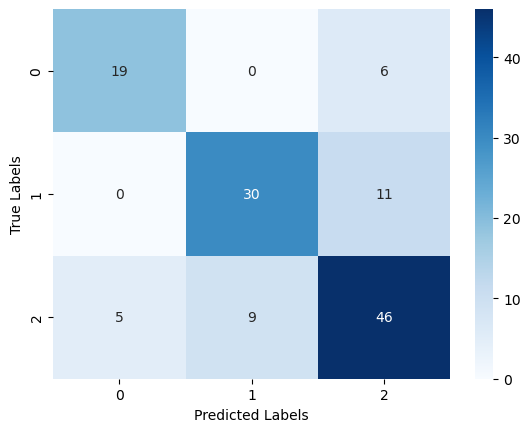

In [ ]:
log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')
log_clf.fit(X_train, y_train)

y_pred = log_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(log_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Cross Validation: 63.09%
Accuracy: 70.63%
Precision: 71.78%
Recall: 70.63%
F1 Score: 70.43%
Confusion Matrix:


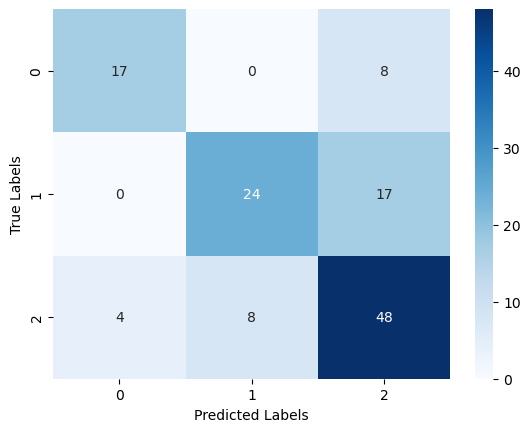

In [ ]:
rf_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                criterion='gini', max_depth=None, max_features='sqrt',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0, min_samples_leaf=1,
                                min_samples_split=2, min_weight_fraction_leaf=0.0,
                                n_estimators=100, n_jobs=-1, oob_score=False,
                                random_state=123, verbose=0, warm_start=False)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(rf_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Cross Validation: 62.69%
Accuracy: 65.08%
Precision: 66.26%
Recall: 65.08%
F1 Score: 64.40%
Confusion Matrix:


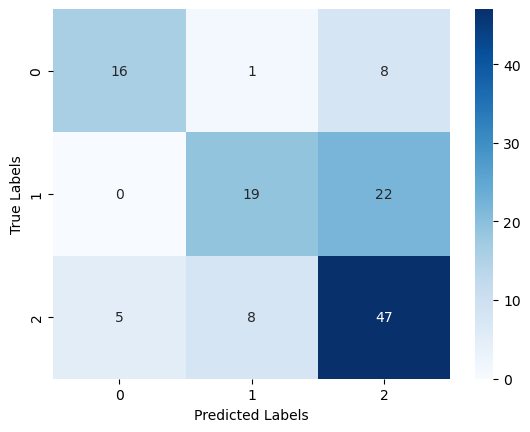

In [ ]:
rg_clf = RidgeClassifier(alpha=1.0, copy_X=True, fit_intercept=True, random_state=123, solver='auto', tol=0.0001)
rg_clf.fit(X_train, y_train)

y_pred = rg_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(rg_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Cross Validation: 66.08%
Accuracy: 67.46%
Precision: 68.60%
Recall: 67.46%
F1 Score: 67.37%
Confusion Matrix:


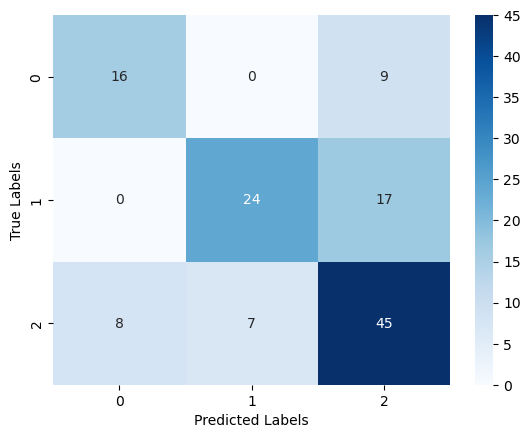

In [ ]:
gb_clf = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False)

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(gb_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Cross Validation: 50.49%
Accuracy: 65.08%
Precision: 65.50%
Recall: 65.08%
F1 Score: 64.49%
Confusion Matrix:


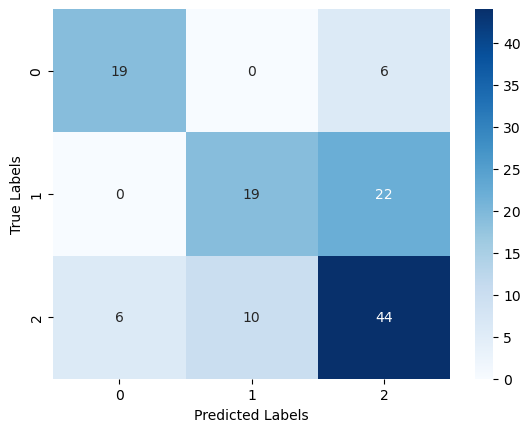

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(15, 10), alpha=3, learning_rate='adaptive', max_iter=100000)
mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(mlp_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
log_clf_preds = log_clf.predict(X_test)
    
log_clf_accuracy = (log_clf_preds == y_test)
print('Test Accuracy =', format( np.sum(log_clf_accuracy)/num_test, '.2%'))

Test Accuracy = 75.40%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')
log_clf.fit(X_train, y_train)
log_clf_preds = log_clf.predict(X_test)

print('Logistic Regression:')
print('Accuracy:', format(accuracy_score(y_test, log_clf_preds), '.2%'))
print('Precision:', format(precision_score(y_test, log_clf_preds, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, log_clf_preds, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, log_clf_preds, average='weighted'), '.2%'))

d:\ANconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression:
Accuracy: 75.40%
Precision: 75.51%
Recall: 75.40%
F1 Score: 75.41%


In [ ]:
joblib.dump(log_clf, 'model/alzheimer_model.pkl')

['model/alzheimer_model.pkl']